In [1]:
import pandas as pd
import numpy as np

# =========================
# 1. Load data
# =========================
df_raw = pd.read_csv("./data/raw/financial_report_bank_quarterly.csv")
df = df_raw.copy()

# ============================
# 2. Remove existing z_score
# ============================
for col in df.columns:
    if col in ["ZSCORE"]:    
        df = df.drop(columns=[col])

# Check data
df.head()

,symbol,calendarYear,period,time,Size,DER,DAR,ROA,ROE,SDOA,SDROE,Tobinq,PPE,Cash,AR,Log_Sales,SGR,operatingIncomeRatio
0,AGRO.JK,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,0.000551,0.501982,0.016406,0.102357,0.005095,25.764395,0.004025,-0.266365
1,AGRO.JK,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,0.000210,0.367396,0.028464,0.115185,0.006752,26.305030,0.003185,-0.327832
2,AGRO.JK,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,0.000553,0.529662,0.030477,0.086416,0.000000,26.295740,0.002681,0.108593
3,AGRO.JK,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,0.000624,0.569790,0.030970,0.090348,0.000000,26.178936,0.002838,-0.070020
4,AGRO.JK,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,0.000122,0.549454,0.021044,0.100950,0.004835,25.589815,0.001589,0.109110


In [2]:
# =========================
# 3. Standardize column names
# - trim spasi
# - sisip underscore sebelum huruf besar (camelCase → snake_case)
# - lowercase
# - ganti spasi & titik jadi underscore
# =========================
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True)  # camelCase -> snake_case
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('.', '_')
)

# =========================
# 4. Hapus suffix ".JK" di akhir symbol
# =========================
df["symbol"] = df["symbol"].str.replace(".JK", "", regex=False)


# =========================
# 5. Extract quarter from period
# =========================
df['quarter'] = df['period'].str.extract(r'Q(\d)').astype(int)


# =========================
# 6. Make sure numeric column becomes float
# (pakai nama kolom SETELAH di-normalisasi)
# =========================
num_cols = [
    'calendar_year', 'size', 'der', 'dar', 'roa', 'roe', 'sdoa', 'sdroe',
    'tobinq', 'ppe', 'cash', 'ar', 'log_sales', 'sgr',
    'operating_income_ratio', 'quarter'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Validasi kolom di df
num_cols = [c for c in num_cols if c in df.columns]

print(df.dtypes)
df.head(10)

symbol                     object
calendar_year               int64
period                     object
time                       object
size                      float64
der                       float64
dar                       float64
roa                       float64
roe                       float64
sdoa                      float64
sdroe                     float64
tobinq                    float64
ppe                       float64
cash                      float64
ar                        float64
log_sales                 float64
sgr                       float64
operating_income_ratio    float64
quarter                     int64
dtype: object


,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,sdroe,tobinq,ppe,cash,ar,log_sales,sgr,operating_income_ratio,quarter
0,AGRO,2024,Q3,2024Q3,30.182129,0.323421,0.087195,0.001081,0.004009,0.000141,0.000551,0.501982,0.016406,0.102357,0.005095,25.764395,0.004025,-0.266365,3
1,AGRO,2024,Q2,2024Q2,30.202428,0.196830,0.051464,0.000830,0.003175,0.000034,0.000210,0.367396,0.028464,0.115185,0.006752,26.305030,0.003185,-0.327832,2
2,AGRO,2024,Q1,2024Q1,30.135852,0.135951,0.038061,0.000748,0.002673,0.000138,0.000553,0.529662,0.030477,0.086416,0.000000,26.295740,0.002681,0.108593,1
3,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,0.000624,0.569790,0.030970,0.090348,0.000000,26.178936,0.002838,-0.070020,4
4,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,0.000122,0.549454,0.021044,0.100950,0.004835,25.589815,0.001589,0.109110,3
5,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,0.003565,0.665256,0.023234,0.126763,0.005011,25.663972,0.001438,0.748114,2
6,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,0.005456,0.630988,0.023374,0.133398,0.004421,25.750278,0.001289,0.859516,1
7,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,0.008533,0.480222,0.021719,0.153328,0.008173,25.901136,-0.006162,0.531961,4
8,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,0.013549,0.811311,0.013106,0.101587,0.007046,25.750917,0.007181,0.604808,3
9,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,0.234602,0.853622,0.010696,0.212144,0.004904,25.987949,-0.013298,0.302642,2


In [3]:
# =========================
# 6B. Data completeness check (year/quarter & bank-year)
# =========================

# 1) Jumlah row per (year, quarter) + pivot Q1..Q4
cnt_yq = (
    df.groupby(["calendar_year", "period"])
      .size()
      .reset_index(name="n_rows")
      .sort_values(["calendar_year", "period"])
)

pivot_yq = (
    cnt_yq.pivot(index="calendar_year", columns="period", values="n_rows")
          .fillna(0)
          .astype(int)
)

for q in ["Q1", "Q2", "Q3", "Q4"]:
    if q not in pivot_yq.columns:
        pivot_yq[q] = 0

pivot_yq = pivot_yq[["Q1", "Q2", "Q3", "Q4"]]
pivot_yq["total_rows"] = pivot_yq.sum(axis=1)

print("=== Rows per year x quarter (pivot) ===")
display(pivot_yq)


# 2) Completeness per bank-year: harus ada 4 quarter
bank_year_q = (
    df.groupby(["symbol", "calendar_year"])["quarter"]
      .nunique()
      .reset_index(name="n_quarters")
)

year_completeness = (
    bank_year_q.groupby("calendar_year")
      .agg(
          n_banks=("symbol", "nunique"),
          banks_complete_4q=("n_quarters", lambda s: (s == 4).sum())
      )
      .reset_index()
)

year_completeness["pct_complete_4q"] = (
    year_completeness["banks_complete_4q"] / year_completeness["n_banks"]
).round(3)

print("=== Bank-year completeness (4 quarters) ===")
display(year_completeness)


# 3) Tunjukin tahun yang bermasalah (tidak semua bank lengkap 4Q)
problem_years = year_completeness[
    year_completeness["banks_complete_4q"] != year_completeness["n_banks"]
].copy()

print("=== Years with incomplete bank-year coverage ===")
display(problem_years)


# 4) Detail bank mana yang tidak lengkap di tahun bermasalah
if len(problem_years) > 0:
    py = problem_years["calendar_year"].tolist()
    bad_bank_year = bank_year_q[
        (bank_year_q["calendar_year"].isin(py)) & (bank_year_q["n_quarters"] != 4)
    ].sort_values(["calendar_year", "symbol"])
    print("=== Example incomplete bank-years (n_quarters != 4) ===")
    display(bad_bank_year.head(50))

=== Rows per year x quarter (pivot) ===


period,Q1,Q2,Q3,Q4,total_rows
calendar_year,,,,,
2009,1,0,0,2,3
2010,2,2,3,6,13
2011,20,19,23,25,87
2012,29,30,40,42,141
2013,42,42,42,41,167
2014,45,45,45,45,180
2015,45,45,44,45,179
2016,45,45,45,45,180
2017,45,45,45,45,180


=== Bank-year completeness (4 quarters) ===


,calendar_year,n_banks,banks_complete_4q,pct_complete_4q
0,2009,2,0,0.000
1,2010,7,1,0.143
2,2011,25,19,0.760
3,2012,42,29,0.690
4,2013,42,41,0.976
5,2014,45,45,1.000
6,2015,45,44,0.978
7,2016,45,45,1.000
8,2017,45,45,1.000
9,2018,45,45,1.000


=== Years with incomplete bank-year coverage ===


,calendar_year,n_banks,banks_complete_4q,pct_complete_4q
0,2009,2,0,0.000
1,2010,7,1,0.143
2,2011,25,19,0.760
3,2012,42,29,0.690
4,2013,42,41,0.976
6,2015,45,44,0.978
15,2024,46,4,0.087


=== Example incomplete bank-years (n_quarters != 4) ===


,symbol,calendar_year,n_quarters
160,BBRI,2009,1
187,BBTN,2009,2
117,BBKP,2010,2
145,BBNI,2010,1
161,BBRI,2010,2
230,BDMN,2010,1
286,BJBR,2010,1
438,BTPN,2010,2
50,BABP,2011,2
216,BCIC,2011,2


In [4]:
# =========================
# 6C. Filter years for modeling + (recommended) keep only complete bank-years (4Q)
# =========================

YEAR_START = 2014
YEAR_END   = 2023  # inclusive

df_before = df.copy()

# 1) Keep only selected years
df = df[df["calendar_year"].between(YEAR_START, YEAR_END)].copy()

print("Rows before year filter:", len(df_before))
print("Rows after  year filter:", len(df))

# Buktiin tahun yang kebuang berapa row-nya
removed_by_year = (
    df_before.loc[~df_before["calendar_year"].between(YEAR_START, YEAR_END)]
      .groupby("calendar_year")
      .size()
      .reset_index(name="removed_rows")
      .sort_values("calendar_year")
)
print("=== Removed rows by year (outside selected range) ===")
display(removed_by_year)

# 2) (Recommended) Strict: keep only bank-year that has all 4 quarters
bank_year_ok = (
    df.groupby(["symbol", "calendar_year"])["quarter"]
      .nunique()
      .reset_index(name="n_quarters")
)

ok_pairs = bank_year_ok[bank_year_ok["n_quarters"] == 4][["symbol", "calendar_year"]]

df_strict = df.merge(ok_pairs, on=["symbol", "calendar_year"], how="inner").copy()

print("Rows after strict complete-4Q filter:", len(df_strict))
print("Dropped by strict filter:", len(df) - len(df_strict))

# (opsional) set df = df_strict kalau memang mau strict untuk modeling
df = df_strict

# 3) Quick re-check: pivot year-quarter setelah filtering
cnt_yq_after = (
    df.groupby(["calendar_year", "period"])
      .size()
      .reset_index(name="n_rows")
)

pivot_after = (
    cnt_yq_after.pivot(index="calendar_year", columns="period", values="n_rows")
               .fillna(0).astype(int)
)

for q in ["Q1", "Q2", "Q3", "Q4"]:
    if q not in pivot_after.columns:
        pivot_after[q] = 0

pivot_after = pivot_after[["Q1","Q2","Q3","Q4"]]
pivot_after["total_rows"] = pivot_after.sum(axis=1)

print("=== After filtering: Rows per year x quarter (pivot) ===")
display(pivot_after)

Rows before year filter: 2367
Rows after  year filter: 1815
=== Removed rows by year (outside selected range) ===


,calendar_year,removed_rows
0,2009,3
1,2010,13
2,2011,87
3,2012,141
4,2013,167
5,2024,141


Rows after strict complete-4Q filter: 1812
Dropped by strict filter: 3
=== After filtering: Rows per year x quarter (pivot) ===


period,Q1,Q2,Q3,Q4,total_rows
calendar_year,,,,,
2014,45,45,45,45,180
2015,44,44,44,44,176
2016,45,45,45,45,180
2017,45,45,45,45,180
2018,45,45,45,45,180
2019,45,45,45,45,180
2020,46,46,46,46,184
2021,46,46,46,46,184
2022,46,46,46,46,184


In [5]:
# ============================
# 7. Count Bank Z-Score
# ============================

# Equity-to-Assets ratio (E/A) ≈ 1 - DAR
df["equity_to_assets"] = 1 - df["dar"]

# Std dev ROA per bank (per symbol)
df["roa_std_bank"] = (
    df.groupby("symbol")["roa"]
      .transform("std")
)

# Bank Stability Z-Score:
# bank_zscore = (ROA + E/A) / σ(ROA)
df["bank_zscore"] = (df["roa"] + df["equity_to_assets"]) / df["roa_std_bank"]

# Hindari pembagian 0 / NaN (misal bank baru punya 1 periode data)
mask_bad = df["roa_std_bank"].isna() | (df["roa_std_bank"] == 0)
df.loc[mask_bad, "bank_zscore"] = np.nan

df[["symbol", "calendar_year", "quarter", "roa", "dar", "roa_std_bank", "bank_zscore"]].head(100)

,symbol,calendar_year,quarter,roa,dar,roa_std_bank,bank_zscore
0,AGRO,2023,4,0.000778,0.043646,0.018465,51.835988
1,AGRO,2023,3,0.000472,0.008067,0.018465,53.746257
2,AGRO,2023,2,0.000408,0.009662,0.018465,53.656465
3,AGRO,2023,1,0.000346,0.009062,0.018465,53.685576
4,AGRO,2022,4,-0.001512,0.007952,0.018465,53.645055
...,...,...,...,...,...,...,...
95,AMAR,2020,1,0.005068,0.000020,0.010788,93.165612
96,AMAR,2019,4,-0.000412,0.000027,0.010788,92.656959
97,AMAR,2019,3,0.012060,0.000000,0.010788,93.815667
98,AMAR,2019,2,0.006640,0.004800,0.010788,92.868286


count    1812.000000
mean      526.906084
std       525.508942
min        27.010042
25%       106.046353
50%       449.951856
75%       718.735710
max      3282.916478
Name: bank_zscore, dtype: float64


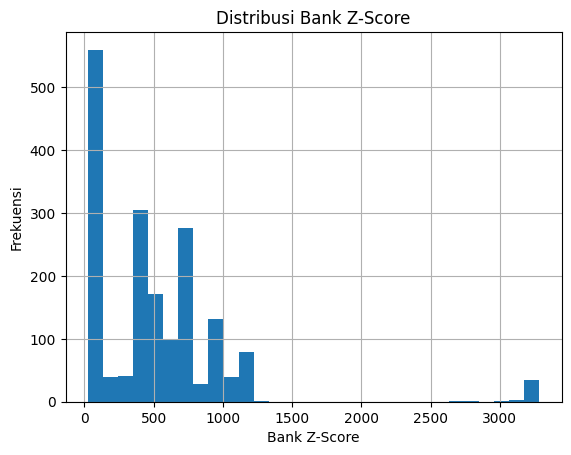

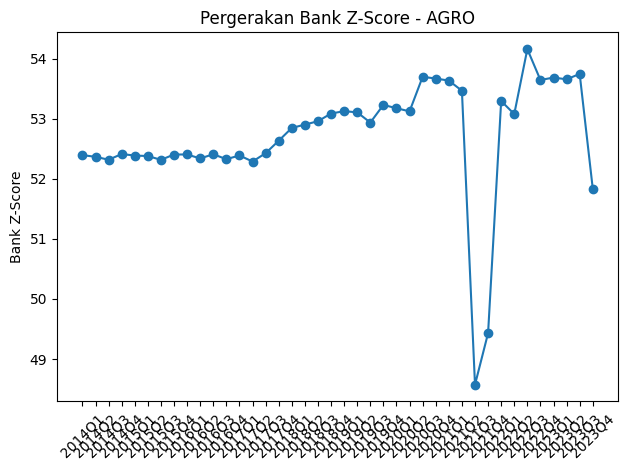

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 8. Cek Distribusi Bank Z-Score
# ============================

# Cek ringkasan statistik Bank Z-Score
print(df["bank_zscore"].describe())

# Melihat distribusi Bank Z-Score
plt.figure()
df["bank_zscore"].hist(bins=30)
plt.xlabel("Bank Z-Score")
plt.ylabel("Frekuensi")
plt.title("Distribusi Bank Z-Score")
plt.show()

# Ambil sample time series per 1 bank (ex. AGRO)
sample_symbol = df["symbol"].iloc[0]
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

In [7]:
# ============================
# 9. Cek Anomali Distribusi Bank Z-Score
# ============================

# Cek 10 nilai terbesar & terkecil
top10 = df.nlargest(10, "bank_zscore")[["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]]
bottom10 = df.nsmallest(10, "bank_zscore")[["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]]

print("TOP 10 Bank Z-Score:", top10)
print("BOTTOM 10 Bank Z-Score:", bottom10)

TOP 10 Bank Z-Score:      symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
1653   NOBU  2023Q3  3282.916478  0.001683          0.999712      0.000305
1665   NOBU  2020Q3  3282.811635  0.001363          1.000000      0.000305
1673   NOBU  2018Q3  3282.662209  0.001318          1.000000      0.000305
1666   NOBU  2020Q2  3282.638847  0.001311          1.000000      0.000305
1688   NOBU  2014Q4  3282.513431  0.001272          1.000000      0.000305
1667   NOBU  2020Q1  3282.472074  0.001260          1.000000      0.000305
1682   NOBU  2016Q2  3282.327948  0.001216          1.000000      0.000305
1669   NOBU  2019Q3  3282.169033  0.001167          1.000000      0.000305
1676   NOBU  2017Q4  3282.166327  0.001166          1.000000      0.000305
1685   NOBU  2015Q3  3281.959474  0.001103          1.000000      0.000305
BOTTOM 10 Bank Z-Score:     symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
244   BANK  2022Q4    27.010042 -0.025034          0.850

In [8]:
# Cek apakah nilai Bank Z-Score yang besar, bukan karena ROA yang besar,
# namun karena std ROA yang sangat kecil

sus = df[df["bank_zscore"] > df["bank_zscore"].quantile(0.99)][
    ["symbol", "time", "bank_zscore", "roa", "equity_to_assets", "roa_std_bank"]
]
print("Sus > P99:", sus.head(20))

Sus > P99:      symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank
1653   NOBU  2023Q3  3282.916478  0.001683          0.999712      0.000305
1654   NOBU  2023Q2  3281.922151  0.001382          0.999710      0.000305
1655   NOBU  2023Q1  3281.559569  0.001309          0.999672      0.000305
1656   NOBU  2022Q4  3281.397062  0.001285          0.999647      0.000305
1657   NOBU  2022Q3  3281.353604  0.001322          0.999596      0.000305
1665   NOBU  2020Q3  3282.811635  0.001363          1.000000      0.000305
1666   NOBU  2020Q2  3282.638847  0.001311          1.000000      0.000305
1667   NOBU  2020Q1  3282.472074  0.001260          1.000000      0.000305
1668   NOBU  2019Q4  3281.400246  0.000933          1.000000      0.000305
1669   NOBU  2019Q3  3282.169033  0.001167          1.000000      0.000305
1670   NOBU  2019Q2  3281.271240  0.000893          1.000000      0.000305
1673   NOBU  2018Q3  3282.662209  0.001318          1.000000      0.000305
1674   NOBU  2

count    1812.000000
mean      526.906084
std       525.508942
min        27.010042
25%       106.046353
50%       449.951856
75%       718.735710
max      3282.916478
Name: bank_zscore, dtype: float64
Lower bound (IQR): -812.987681357652
Upper bound (IQR): 1637.769744649071
Jumlah outlier (IQR): 40


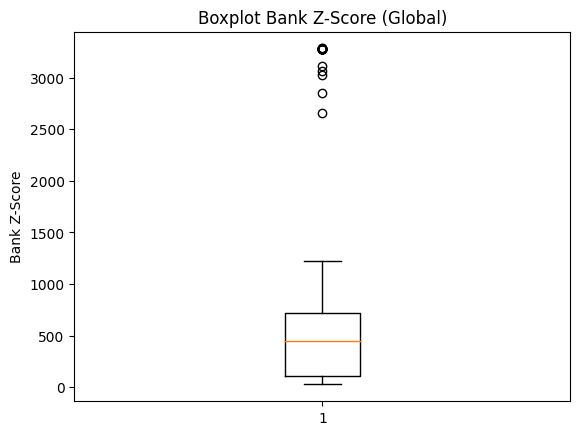

In [9]:
# ============================
# 10. Cek Anomali Distribusi Bank Z-Score menggunakan IQR
# ============================

# Cek Outlier Bank Z-Score

import numpy as np
import matplotlib.pyplot as plt

print(df["bank_zscore"].describe())

# IQR rule
Q1 = df["bank_zscore"].quantile(0.25)
Q3 = df["bank_zscore"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower bound (IQR):", lower)
print("Upper bound (IQR):", upper)

outliers_iqr = df[(df["bank_zscore"] < lower) | (df["bank_zscore"] > upper)]
print("Jumlah outlier (IQR):", len(outliers_iqr))

# Visualisasi Boxplot
plt.figure()
plt.boxplot(df["bank_zscore"].dropna(), vert=True)
plt.ylabel("Bank Z-Score")
plt.title("Boxplot Bank Z-Score (Global)")
plt.show()

In [208]:
# Karena Mean 458.148501 > Median 413.631565
# Ekor atas lebih panjang (Jumlah Q3 651, sedangkan Max nya 2014, selisih = 1363)
# Ekor bawah lebih pendek (Jumlah Min nya 26, sedangkan Q1 121, selisih = 95)
# => Distribusinya right-skewed

In [10]:
# Fisher-Pearson Skewness Coef
sk = df["bank_zscore"].skew() 
print(sk)

3.01735215452367


In [11]:
# Cek anomali bank_zscore dari Upper Bound IQR, terhadap ROA

df["roa_count_bank"] = df.groupby("symbol")["roa"].transform("count")

top_outliers = (
    df[df["bank_zscore"] > 1445.5546]  # berdasarkan Upper Bound IQR
      .sort_values("bank_zscore", ascending=False)
      [[
          "symbol", "time",
          "bank_zscore",
          "roa",
          "equity_to_assets",   # 1 - dar
          "roa_std_bank",
          "roa_count_bank",
      ]]
)

print(top_outliers.head(10))
print("Jumlah outlier (IQR):", len(top_outliers))

df.head(10)

     symbol    time  bank_zscore       roa  equity_to_assets  roa_std_bank  \
1653   NOBU  2023Q3  3282.916478  0.001683          0.999712      0.000305   
1665   NOBU  2020Q3  3282.811635  0.001363          1.000000      0.000305   
1673   NOBU  2018Q3  3282.662209  0.001318          1.000000      0.000305   
1666   NOBU  2020Q2  3282.638847  0.001311          1.000000      0.000305   
1688   NOBU  2014Q4  3282.513431  0.001272          1.000000      0.000305   
1667   NOBU  2020Q1  3282.472074  0.001260          1.000000      0.000305   
1682   NOBU  2016Q2  3282.327948  0.001216          1.000000      0.000305   
1669   NOBU  2019Q3  3282.169033  0.001167          1.000000      0.000305   
1676   NOBU  2017Q4  3282.166327  0.001166          1.000000      0.000305   
1685   NOBU  2015Q3  3281.959474  0.001103          1.000000      0.000305   

      roa_count_bank  
1653              40  
1665              40  
1673              40  
1666              40  
1688              40  
166

,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,...,cash,ar,log_sales,sgr,operating_income_ratio,quarter,equity_to_assets,roa_std_bank,bank_zscore,roa_count_bank
0,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,...,0.090348,0.000000,26.178936,0.002838,-0.070020,4,0.956354,0.018465,51.835988,40
1,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,...,0.100950,0.004835,25.589815,0.001589,0.109110,3,0.991933,0.018465,53.746257,40
2,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,...,0.126763,0.005011,25.663972,0.001438,0.748114,2,0.990338,0.018465,53.656465,40
3,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,...,0.133398,0.004421,25.750278,0.001289,0.859516,1,0.990938,0.018465,53.685576,40
4,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,...,0.153328,0.008173,25.901136,-0.006162,0.531961,4,0.992048,0.018465,53.645055,40
5,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,...,0.101587,0.007046,25.750917,0.007181,0.604808,3,0.998713,0.018465,54.159187,40
6,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,...,0.212144,0.004904,25.987949,-0.013298,0.302642,2,0.982304,0.018465,53.078256,40
7,AGRO,2022,Q1,2022Q1,30.210729,0.104604,0.019542,0.003616,0.019357,0.040703,...,0.087462,0.005788,26.071205,0.019739,1.057798,1,0.980458,0.018465,53.295086,40
8,AGRO,2021,Q4,2021Q4,30.456352,0.105068,0.015310,-0.071969,-0.493914,0.039182,...,0.126926,0.004537,26.370758,-0.330617,-4.723334,4,0.984690,0.018465,49.430776,40
9,AGRO,2021,Q3,2021Q3,30.653131,0.103060,0.012642,-0.090484,-0.737646,0.042901,...,0.053678,0.004384,26.066827,-0.424509,-8.099371,3,0.987358,0.018465,48.572559,40


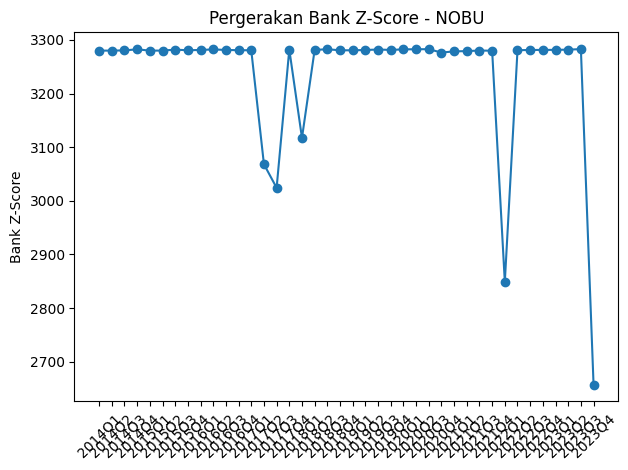

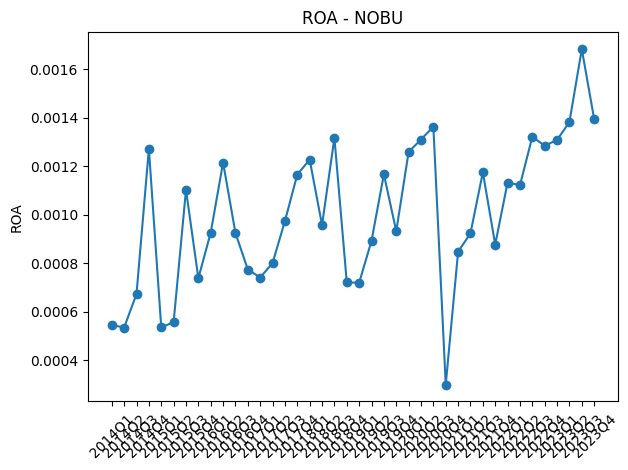

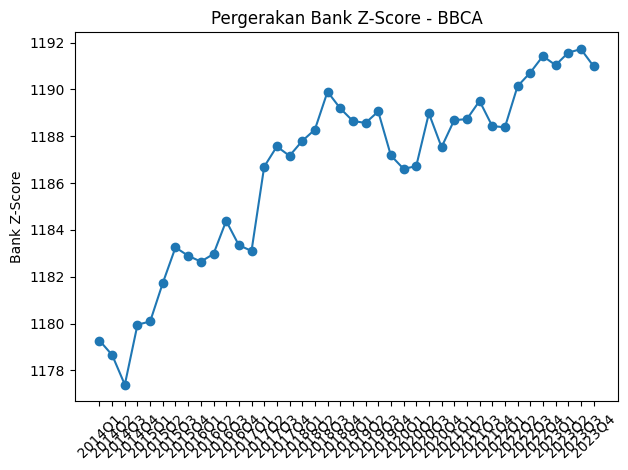

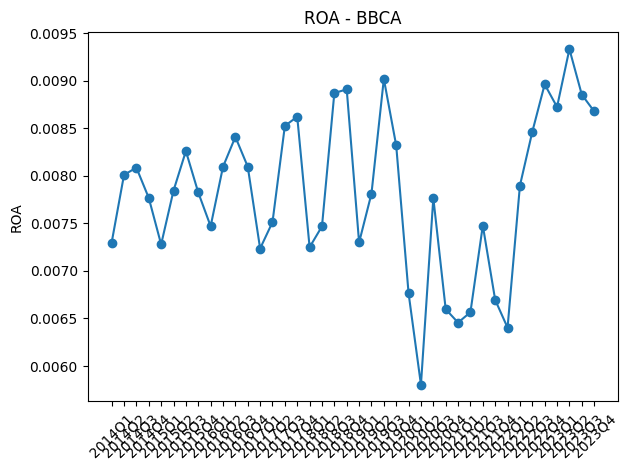

In [12]:
# => Terlihat data yang memiliki anomali pada ROA adalah NOBU

# Ambil sample time series per 1 bank (ex. NOBU)
sample_symbol = 'NOBU'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

sample_symbol = 'NOBU'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["roa"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("ROA")
plt.title(f"ROA - {sample_symbol}")
plt.tight_layout()
plt.show()

# Ambil sample time series per 1 bank (ex. BBCA)
sample_symbol = 'BBCA'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["bank_zscore"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Bank Z-Score")
plt.title(f"Pergerakan Bank Z-Score - {sample_symbol}")
plt.tight_layout()
plt.show()

sample_symbol = 'BBCA'
plot_df = df[df["symbol"] == sample_symbol].sort_values(["calendar_year", "quarter"])
plt.figure()
plt.plot(plot_df["time"], plot_df["roa"], marker="o")
plt.xticks(rotation=45)
plt.ylabel("ROA")
plt.title(f"ROA - {sample_symbol}")
plt.tight_layout()
plt.show()

In [13]:
# Cek summary value Bank Z-Score per Bank Symbol (Before Handle Data Anomali)

summary = (
    df.groupby("symbol")
      .agg(
          bank_z_min=("bank_zscore", "min"),
          bank_z_max=("bank_zscore", "max"),
          n_obs=("bank_zscore", "count"),
          bank_z_mean=("bank_zscore", "mean"),
          bank_z_std=("bank_zscore", "std"),
          roa_std=("roa", "std"),
      )
      .sort_values("bank_z_max", ascending=False)
)
summary.head(20)
summary.tail(20)

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
MAYA,405.568934,420.893930,40,415.147876,3.725809,0.002353
DNAR,366.701299,417.361101,40,411.639715,9.791796,0.002408
MEGA,391.973726,402.347764,40,399.284395,2.393219,0.002507
BVIC,346.031430,399.165781,40,380.852187,10.324638,0.002414
BBSI,262.602209,267.117247,40,264.076999,0.934194,0.003808
BNLI,169.001380,180.550301,40,174.962124,2.358424,0.005496
BTPS,125.872396,131.076533,40,129.257225,1.171277,0.007839
BEKS,89.981371,127.904807,40,122.347822,10.443311,0.007826
AGRS,77.123084,121.714454,40,88.966308,9.990861,0.008080


In [14]:
# ============================
# 11. Handle Data Anomali
# ============================

# Set Rules for Data Anomali
# a. Min std ROA 0.0005
# b. Min 8 Quarter per bank

MIN_N = 8
MIN_STD = 5e-4

df['mask_bad'] = (df["roa_count_bank"] < MIN_N) | (df["roa_std_bank"] < MIN_STD)
mask_bad = df['mask_bad']
print("Total data yang akan dibersihkan: ", mask_bad.sum())

# Cek data yang masked as bad
bad_rows = df.loc[mask_bad, [
    "symbol", "time", "bank_zscore",
    "roa", "roa_count_bank", "roa_std_bank"
]].sort_values(["symbol", "time"])

print(bad_rows.head(10))
print("Total row mask_bad:", len(bad_rows))

# Rekap grouping per kode bank
print(bad_rows["symbol"].value_counts())

Total data yang akan dibersihkan:  40
     symbol    time  bank_zscore       roa  roa_count_bank  roa_std_bank
1691   NOBU  2014Q1  3280.132771  0.000546              40      0.000305
1690   NOBU  2014Q2  3280.099340  0.000536              40      0.000305
1689   NOBU  2014Q3  3280.552257  0.000674              40      0.000305
1688   NOBU  2014Q4  3282.513431  0.001272              40      0.000305
1687   NOBU  2015Q1  3280.100444  0.000536              40      0.000305
1686   NOBU  2015Q2  3280.171992  0.000558              40      0.000305
1685   NOBU  2015Q3  3281.959474  0.001103              40      0.000305
1684   NOBU  2015Q4  3280.765739  0.000739              40      0.000305
1683   NOBU  2016Q1  3281.381078  0.000927              40      0.000305
1682   NOBU  2016Q2  3282.327948  0.001216              40      0.000305
Total row mask_bad: 40
symbol
NOBU    40
Name: count, dtype: int64


In [15]:
# Assign NaN ke value bank_zscore ke data Anomali

df_clean = df.copy()
df_clean.loc[mask_bad, "bank_zscore"] = np.nan

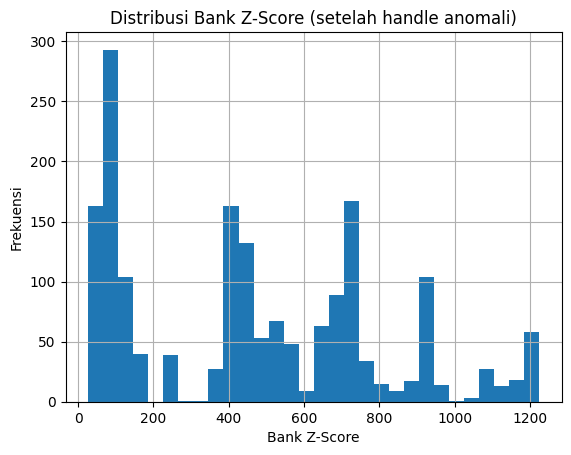

In [16]:
# Cek distribusi Bank Z-Score (setelah handle anomali)

df_clean["bank_zscore"].hist(bins=30)
plt.xlabel("Bank Z-Score")
plt.ylabel("Frekuensi")
plt.title("Distribusi Bank Z-Score (setelah handle anomali)")
plt.show()

In [17]:
# ============================
# 12. Winsorizing / Capping Outlier
# ============================

# Melakukan Winsorizing di percentile 99
cap = df_clean["bank_zscore"].quantile(0.99)
print("Cap P99:", cap)

df_clean["bank_zscore_clean"] = df_clean["bank_zscore"].clip(upper=cap)

Cap P99: 1201.1168500059955


In [18]:
# Cek summary value Bank Z-Score per Bank Symbol (After Handle Data Anomali)

summary_clean = (
    df_clean.groupby("symbol")
      .agg(
          bank_z_min=("bank_zscore", "min"),
          bank_z_max=("bank_zscore", "max"),
          n_obs=("bank_zscore", "count"),
          bank_z_mean=("bank_zscore", "mean"),
          bank_z_std=("bank_zscore", "std"),
          roa_std=("roa", "std"),
      )
      .sort_values("bank_z_max", ascending=False)
)
summary_clean.head(20)
summary_clean.tail(20)

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
DNAR,366.701299,417.361101,40,411.639715,9.791796,0.002408
MEGA,391.973726,402.347764,40,399.284395,2.393219,0.002507
BVIC,346.031430,399.165781,40,380.852187,10.324638,0.002414
BBSI,262.602209,267.117247,40,264.076999,0.934194,0.003808
BNLI,169.001380,180.550301,40,174.962124,2.358424,0.005496
BTPS,125.872396,131.076533,40,129.257225,1.171277,0.007839
BEKS,89.981371,127.904807,40,122.347822,10.443311,0.007826
AGRS,77.123084,121.714454,40,88.966308,9.990861,0.008080
BABP,98.306968,107.680808,40,106.154632,2.225908,0.009302


In [218]:
# Lihat ringkasan khusus BBRI
summary_clean[summary_clean.index == "BBRI"]

,bank_z_min,bank_z_max,n_obs,bank_z_mean,bank_z_std,roa_std
symbol,,,,,,
BBRI,357.016594,391.303535,58,375.109378,8.396794,0.002556


In [19]:
# ============================
# 13. Classify Bank Z-Score Zone
# ============================

import numpy as np
import pandas as pd

z = df_clean["bank_zscore_clean"]

q1 = z.quantile(0.25)
q3 = z.quantile(0.75)

def label_risk(v):
    if pd.isna(v):
        return np.nan
    if v < q1:
        return 2  # High Risk
    elif v < q3:
        return 1  # Medium Risk
    else:
        return 0  # Low Risk

df_clean["bank_zscore_risk_label"] = z.apply(label_risk)

df_clean["bank_zscore_risk"] = (
    df_clean["bank_zscore_risk_label"] == 2
).astype("Int64")

df_clean.head(10)

,symbol,calendar_year,period,time,size,der,dar,roa,roe,sdoa,...,operating_income_ratio,quarter,equity_to_assets,roa_std_bank,bank_zscore,roa_count_bank,mask_bad,bank_zscore_clean,bank_zscore_risk_label,bank_zscore_risk
0,AGRO,2023,Q4,2023Q4,30.151990,0.158755,0.043646,0.000778,0.002830,0.000161,...,-0.070020,4,0.956354,0.018465,51.835988,40,False,51.835988,2.0,1
1,AGRO,2023,Q3,2023Q3,30.067564,0.027119,0.008067,0.000472,0.001587,0.000052,...,0.109110,3,0.991933,0.018465,53.746257,40,False,53.746257,2.0,1
2,AGRO,2023,Q2,2023Q2,30.116618,0.033987,0.009662,0.000408,0.001436,0.000891,...,0.748114,2,0.990338,0.018465,53.656465,40,False,53.656465,2.0,1
3,AGRO,2023,Q1,2023Q1,30.168138,0.033731,0.009062,0.000346,0.001287,0.001173,...,0.859516,1,0.990938,0.018465,53.685576,40,False,53.685576,2.0,1
4,AGRO,2022,Q4,2022Q4,30.262822,0.032612,0.007952,-0.001512,-0.006200,0.001532,...,0.531961,4,0.992048,0.018465,53.645055,40,False,53.645055,2.0,1
5,AGRO,2022,Q3,2022Q3,30.194819,0.006971,0.001287,0.001316,0.007130,0.002406,...,0.604808,3,0.998713,0.018465,54.159187,40,False,54.159187,2.0,1
6,AGRO,2022,Q2,2022Q2,30.303607,0.106791,0.017696,-0.002233,-0.013477,0.034336,...,0.302642,2,0.982304,0.018465,53.078256,40,False,53.078256,2.0,1
7,AGRO,2022,Q1,2022Q1,30.210729,0.104604,0.019542,0.003616,0.019357,0.040703,...,1.057798,1,0.980458,0.018465,53.295086,40,False,53.295086,2.0,1
8,AGRO,2021,Q4,2021Q4,30.456352,0.105068,0.015310,-0.071969,-0.493914,0.039182,...,-4.723334,4,0.984690,0.018465,49.430776,40,False,49.430776,2.0,1
9,AGRO,2021,Q3,2021Q3,30.653131,0.103060,0.012642,-0.090484,-0.737646,0.042901,...,-8.099371,3,0.987358,0.018465,48.572559,40,False,48.572559,2.0,1


In [20]:
# Export cleaned data
output_path = "./data/processed/financial_report_bank_zscore_clean.csv"
df_clean.to_csv(output_path, index=False)

print("Saved to:", output_path)

Saved to: ./data/processed/financial_report_bank_zscore_clean.csv
